In [1]:
import pandas as pd
import numpy as np

In [2]:
CEILING_VALUE = 500000
FLOOR_VALUE = CEILING_VALUE - 100000
CEILING_PERCENT = 0.9
DEPOSIT_VALUE = 125000

def get_home_report_value(value, percent):
    return value / percent


hrv = get_home_report_value(CEILING_VALUE, CEILING_PERCENT)
print(f'GBP {hrv:,.2f}')

GBP 555,555.56


In [3]:
MIN_RANGE = FLOOR_VALUE
MAX_RANGE = CEILING_VALUE

range_value = [float(f) for f in range(MIN_RANGE, MAX_RANGE + 1, 5000)]
print(range_value)

[400000.0, 405000.0, 410000.0, 415000.0, 420000.0, 425000.0, 430000.0, 435000.0, 440000.0, 445000.0, 450000.0, 455000.0, 460000.0, 465000.0, 470000.0, 475000.0, 480000.0, 485000.0, 490000.0, 495000.0, 500000.0]


In [4]:
range_hrv = [round(get_home_report_value(f, CEILING_PERCENT), 2) for f in range_value]
print(range_hrv)

[444444.44, 450000.0, 455555.56, 461111.11, 466666.67, 472222.22, 477777.78, 483333.33, 488888.89, 494444.44, 500000.0, 505555.56, 511111.11, 516666.67, 522222.22, 527777.78, 533333.33, 538888.89, 544444.44, 550000.0, 555555.56]


In [5]:
max_bid = [f + DEPOSIT_VALUE for f in range_value]
print(max_bid)

[525000.0, 530000.0, 535000.0, 540000.0, 545000.0, 550000.0, 555000.0, 560000.0, 565000.0, 570000.0, 575000.0, 580000.0, 585000.0, 590000.0, 595000.0, 600000.0, 605000.0, 610000.0, 615000.0, 620000.0, 625000.0]


In [6]:
differential = list(set(max_bid) - set(range_hrv))
differential

[560000.0,
 565000.0,
 570000.0,
 575000.0,
 580000.0,
 585000.0,
 590000.0,
 595000.0,
 600000.0,
 525000.0,
 605000.0,
 530000.0,
 610000.0,
 535000.0,
 615000.0,
 540000.0,
 620000.0,
 545000.0,
 625000.0,
 555000.0]

In [7]:
data = {
    'Mortgage value': range_value,
    'Home Report Value': range_hrv,
    'Max Bid': max_bid,
}
df = pd.DataFrame(data)

df['Seller Target'] = df['Home Report Value'] * 1.1
df['Deposit'] = df['Home Report Value'] * .1
df['Out of pocket'] = df['Max Bid'] - df['Home Report Value']

df

,Mortgage value,Home Report Value,Max Bid,Seller Target,Deposit,Out of pocket
0,400000.0,444444.44,525000.0,488888.884,44444.444,80555.56
1,405000.0,450000.00,530000.0,495000.000,45000.000,80000.00
2,410000.0,455555.56,535000.0,501111.116,45555.556,79444.44
3,415000.0,461111.11,540000.0,507222.221,46111.111,78888.89
4,420000.0,466666.67,545000.0,513333.337,46666.667,78333.33
5,425000.0,472222.22,550000.0,519444.442,47222.222,77777.78
6,430000.0,477777.78,555000.0,525555.558,47777.778,77222.22
7,435000.0,483333.33,560000.0,531666.663,48333.333,76666.67
8,440000.0,488888.89,565000.0,537777.779,48888.889,76111.11
9,445000.0,494444.44,570000.0,543888.884,49444.444,75555.56


<AxesSubplot:>

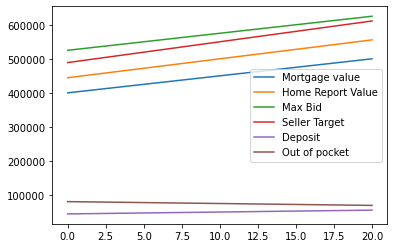

In [8]:
df.plot()